In [1]:
pip install fugashi[unidic-lite]

     |████████████████████████████████| 568 kB 5.6 MB/s 
     |████████████████████████████████| 47.4 MB 166 kB/s 
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658836 sha256=67ca26ac523a22ee91b1fc5917ab23fb8bf0e2245c0835ba757d7b9b62dd3cdb
  Stored in directory: /root/.cache/pip/wheels/de/69/b1/112140b599f2b13f609d485a99e357ba68df194d2079c5b1a2
Successfully built unidic-lite


In [3]:
pip install -U d2l

     |████████████████████████████████| 82 kB 452 kB/s 
     |████████████████████████████████| 15.7 MB 10.8 MB/s 
     |████████████████████████████████| 61 kB 6.6 MB/s 
     |████████████████████████████████| 11.2 MB 35.7 MB/s 
     |████████████████████████████████| 9.9 MB 33.9 MB/s 
     |████████████████████████████████| 930 kB 40.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.0.0
    Uninstalling matplotlib-3.0.0:
      Successfully uninstalled matplotlib-3.0.0
ERROR: pip's depende

In [4]:
pip install datasets

     |████████████████████████████████| 325 kB 4.8 MB/s 
     |████████████████████████████████| 136 kB 12.3 MB/s 
     |████████████████████████████████| 77 kB 5.2 MB/s 
     |████████████████████████████████| 1.1 MB 34.2 MB/s 
     |████████████████████████████████| 212 kB 32.4 MB/s 
     |████████████████████████████████| 138 kB 27.9 MB/s 
     |████████████████████████████████| 94 kB 2.2 MB/s 
     |████████████████████████████████| 144 kB 34.5 MB/s 
     |████████████████████████████████| 271 kB 30.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.25.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you 

In [10]:
pip install matplotlib==3.0.0

  Using cached matplotlib-3.0.0-cp37-cp37m-manylinux1_x86_64.whl (12.8 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires matplotlib!=3.0.0,>=2.0.2, but you have matplotlib 3.0.0 which is incompatible.
scikit-image 0.18.3 requires matplotlib!=3.0.0,>=2.0.0, but you have matplotlib 3.0.0 which is incompatible.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.0 which is incompatible.
mizani 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.0 which is incompatible.
d2l 0.17.5 requires matplotlib==3.5.1, but you have matplotlib 3.0.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which i

In [5]:
import math
import pandas as pd 
import torch
from torch import nn
from d2l import torch as d2l

In [6]:
from datasets import load_dataset
dataset = load_dataset('bsd_ja_en', ignore_verifications=True)

Using custom data configuration default


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2120 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2051 [00:00<?, ? examples/s]

Dataset bsd_ja_en downloaded and prepared to /root/.cache/huggingface/datasets/bsd_ja_en/default/1.0.0/584d1d2fee129f4799fccf10cb83c7cc0a7e6147094435909c3932c4380ddb24. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [7]:
train_data = [dataset['train']['ja_sentence'],dataset['train']['en_sentence']]
test_data = [dataset['test']['ja_sentence'], dataset['test']['en_sentence']]
validation_data = [dataset['validation']['ja_sentence'], dataset['validation']['en_sentence']]

In [11]:
import fugashi
def jnp_tokenize(jnp_text):
  source = []
  tagger = fugashi.Tagger()
  for line in jnp_text:
    sentence = []
    for word in tagger(line.lower()):
      sentence.append(str(word))
    source.append(sentence)
  return source
def eng_tokenize(eng_text):
  target = []
  for line in eng_text:
    tempt = line.lower().split(' ')
    target.append(tempt)
  return target
source = jnp_tokenize(train_data[0])
target = eng_tokenize(train_data[1])
source[:5], target[:5]

([['はい', '、', 'k', '社', 'システム', '開発', '部', 'です', '。'],
  ['h', '社', 'の', '高市', 'と', '申し', 'ます', '。'],
  ['いつ', 'も', 'お', '世話', 'に', 'なっ', 'て', 'おり', 'ます', '。'],
  ['こちら', 'こそ', '、', 'お', '世話', 'に', 'なっ', 'て', 'おり', 'ます', '。'],
  ['稲田', 'さん', 'は', 'いらっしゃい', 'ます', 'か', '？']],
 [['hi',
   'this',
   'is',
   'the',
   'systems',
   'development',
   'department',
   'of',
   'company',
   'k.'],
  ['my', 'name', 'is', 'takaichi', 'from', 'company', 'h.'],
  ['thank', 'you', 'as', 'always.'],
  ['thank', 'you', 'as', 'always', 'as', 'well.'],
  ['is', 'inada-san', 'there?']])

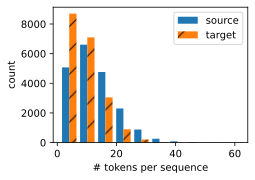

In [12]:
def show_list_len_pair_hist(legend, xlabel, ylabel, xlist, ylist):
    """绘制列表长度对的直方图"""
    d2l.set_figsize()
    _, _, patches = d2l.plt.hist(
        [[len(l) for l in xlist], [len(l) for l in ylist]])
    d2l.plt.xlabel(xlabel)
    d2l.plt.ylabel(ylabel)
    for patch in patches[1].patches:
        patch.set_hatch('/')
    d2l.plt.legend(legend)

show_list_len_pair_hist(['source', 'target'], '# tokens per sequence',
                        'count', source, target);

In [13]:
src_vocab = d2l.Vocab(source, min_freq=2,
                      reserved_tokens=['<pad>', '<bos>', '<eos>'])
len(src_vocab)

5876

In [14]:
def truncate_pad(line, num_steps, padding_token):
    """截断或填充文本序列"""
    if len(line) > num_steps:
        return line[:num_steps]  # 截断
    return line + [padding_token] * (num_steps - len(line))  # 填充

truncate_pad(src_vocab[source[0]], 10, src_vocab['<pad>'])

[39, 5, 757, 42, 245, 301, 112, 10, 4, 1]

In [15]:
def build_array_nmt(lines, vocab, num_steps):
    """将机器翻译的文本序列转换成小批量"""
    lines = [vocab[l] for l in lines]
    lines = [l + [vocab['<eos>']] for l in lines]
    array = torch.tensor([truncate_pad(
        l, num_steps, vocab['<pad>']) for l in lines])
    valid_len = (array != vocab['<pad>']).type(torch.int32).sum(1)
    return array, valid_len

In [16]:
from matplotlib.rcsetup import validate_int
def load_data_nmt(train_text, validation_text, test_text, batch_size, num_steps, num_examples=600):
    """返回翻译数据集的迭代器和词表"""
    source, target = jnp_tokenize(train_text[0]), eng_tokenize(train_text[1])
    valid_source, valid_target = jnp_tokenize(validation_text[0]), eng_tokenize(validation_text[1])
    test_source, test_target = jnp_tokenize(test_text[0]), eng_tokenize(test_text[1])
    src_vocab = d2l.Vocab(source, min_freq=2,
                          reserved_tokens=['<pad>', '<bos>', '<eos>'])
    tgt_vocab = d2l.Vocab(target, min_freq=2,
                          reserved_tokens=['<pad>', '<bos>', '<eos>'])
    src_array, src_valid_len = build_array_nmt(source, src_vocab, num_steps)
    tgt_array, tgt_valid_len = build_array_nmt(target, tgt_vocab, num_steps)

    src_validation_array, src_validation_valid_len = build_array_nmt(valid_source, src_vocab, num_steps)
    tgt_validation_array, tgt_validation_valid_len = build_array_nmt(valid_target, tgt_vocab, num_steps)

    src_test_array, src_test_valid_len = build_array_nmt(test_source, src_vocab, num_steps)
    tgt_test_array, tgt_test_valid_len = build_array_nmt(test_target, tgt_vocab, num_steps)

    data_arrays = (src_array, src_valid_len, tgt_array, tgt_valid_len)

    data_validation_arrays = (src_validation_array, src_validation_valid_len, tgt_validation_array, tgt_validation_valid_len)


    data_test_arrays = (src_test_array, src_test_valid_len, tgt_test_array, tgt_test_valid_len)
    
    train_iter = d2l.load_array(data_arrays, batch_size)
    validation_iter = d2l.load_array(data_validation_arrays, batch_size)
    test_iter = d2l.load_array(data_test_arrays, batch_size)
    return train_iter, validation_iter, test_iter,src_vocab, tgt_vocab

In [18]:
train_iter, vlidation_iter, test_iter, _, _ = load_data_nmt(train_data, validation_data, test_data, 2, 10)
for X, X_valid_len, Y, Y_valid_len in train_iter:
    print('X:', X.type(torch.int32))
    print('X的有效长度:', X_valid_len)
    print('Y:', Y.type(torch.int32))
    print('Y的有效长度:', Y_valid_len)
    break

X: tensor([[1047, 4030,   10,   23,   21,   19,    3,    1,    1,    1],
        [ 121,   10,   23,    5,   24,  290,   83,   57,    4,    3]],
       dtype=torch.int32)
X的有效长度: tensor([ 7, 10])
Y: tensor([[  38,  258,    8,  955,  119,    3,    1,    1,    1,    1],
        [  52, 1132,   51,   90,   46,  370,    3,    1,    1,    1]],
       dtype=torch.int32)
Y的有效长度: tensor([6, 7])


In [19]:
class PositionWiseFFN(nn.Module):
  def __init__(self, ffn_num_input, ffn_num_hiddens, ffn_num_outputs, **kwargs):
    super(PositionWiseFFN, self).__init__(**kwargs)
    self.dense1 = nn.Linear(ffn_num_input, ffn_num_hiddens)
    self.relu = nn.ReLU()
    self.dense2 = nn.Linear(ffn_num_hiddens, ffn_num_outputs)
  
  def forward(self, X):
    return self.dense2(self.relu(self.dense1(X)))

In [20]:
class AddNorm(nn.Module):
  def __init__(self, normalized_shape, dropout, **kwargs):
    super(AddNorm, self).__init__(**kwargs)
    self.dropout = nn.Dropout(dropout)
    self.ln = nn.LayerNorm(normalized_shape)
  
  def forward(self, X, Y):
    return self.ln(self.dropout(Y) + X)

In [21]:
class EncoderBlock(nn.Module):
  def __init__(self,key_size, query_size, value_size, num_hiddens,
               norm_shape, ffn_num_input, ffn_num_hiddens, num_heads,
               dropout, use_bias = False, **kwargs):
    super(EncoderBlock, self).__init__(**kwargs)
    self.attention = d2l.MultiHeadAttention(
        key_size, query_size, value_size, num_hiddens, num_heads, dropout, 
        use_bias)
    self.addnorm1 = AddNorm(norm_shape, dropout)
    self.ffn = PositionWiseFFN(
        ffn_num_input, ffn_num_hiddens, num_hiddens)
    self.addnorm2 = AddNorm(norm_shape, dropout)
  
  def forward(self, X, valid_lens):
    Y = self.addnorm1(X, self.attention(X, X, X, valid_lens))
    return self.addnorm2(Y, self.ffn(Y))    

In [22]:
class TransformerEncoder(d2l.Encoder):
  def __init__(self, vocab_size, key_size, query_size, value_size, 
               num_hiddens, norm_shape, ffn_num_inputs, ffn_num_hiddens, 
               num_heads, num_layers, dropout, use_bias = False, **kwargs):
    super(TransformerEncoder, self).__init__(**kwargs)
    self.num_hiddens = num_hiddens
    self.embedding = nn.Embedding(vocab_size, num_hiddens)
    self.pos_encoding = d2l.PositionalEncoding(num_hiddens, dropout)
    self.blks = nn.Sequential()
    for i in range(num_layers):
      self.blks.add_module('block' + str(i),
                           EncoderBlock(key_size, query_size, value_size, num_hiddens,
                                        norm_shape, ffn_num_inputs, ffn_num_hiddens,
                                        num_heads, dropout, use_bias))
  
  def forward(self, X, valid_lens, *args):
    X = self.pos_encoding(self.embedding(X) * math.sqrt(self.num_hiddens))
    self.attention_weights = [None] * len(self.blks)
    for i, blk in enumerate(self.blks):
      X = blk(X, valid_lens)
      self.attention_weights[i] = blk.attention.attention.attention_weights
    return X


In [23]:
class DecoderBlock(nn.Module):
    """解码器中第i个块"""
    def __init__(self, key_size, query_size, value_size, num_hiddens,
                 norm_shape, ffn_num_input, ffn_num_hiddens, num_heads,
                 dropout, i, **kwargs):
        super(DecoderBlock, self).__init__(**kwargs)
        self.i = i
        self.attention1 = d2l.MultiHeadAttention(
            key_size, query_size, value_size, num_hiddens, num_heads, dropout)
        self.addnorm1 = AddNorm(norm_shape, dropout)
        self.attention2 = d2l.MultiHeadAttention(
            key_size, query_size, value_size, num_hiddens, num_heads, dropout)
        self.addnorm2 = AddNorm(norm_shape, dropout)
        self.ffn = PositionWiseFFN(ffn_num_input, ffn_num_hiddens,
                                   num_hiddens)
        self.addnorm3 = AddNorm(norm_shape, dropout)

    def forward(self, X, state):
        enc_outputs, enc_valid_lens = state[0], state[1]
        # 训练阶段，输出序列的所有词元都在同一时间处理，
        # 因此state[2][self.i]初始化为None。
        # 预测阶段，输出序列是通过词元一个接着一个解码的，
        # 因此state[2][self.i]包含着直到当前时间步第i个块解码的输出表示
        if state[2][self.i] is None:
            key_values = X
        else:
            key_values = torch.cat((state[2][self.i], X), axis=1)
        state[2][self.i] = key_values
        if self.training:
            batch_size, num_steps, _ = X.shape
            # dec_valid_lens的开头:(batch_size,num_steps),
            # 其中每一行是[1,2,...,num_steps]
            dec_valid_lens = torch.arange(
                1, num_steps + 1, device=X.device).repeat(batch_size, 1)
        else:
            dec_valid_lens = None

        # 自注意力
        X2 = self.attention1(X, key_values, key_values, dec_valid_lens)
        Y = self.addnorm1(X, X2)
        # 编码器－解码器注意力。
        # enc_outputs的开头:(batch_size,num_steps,num_hiddens)
        Y2 = self.attention2(Y, enc_outputs, enc_outputs, enc_valid_lens)
        Z = self.addnorm2(Y, Y2)
        return self.addnorm3(Z, self.ffn(Z)), state

In [24]:
class TransformerDecoder(d2l.AttentionDecoder):
    def __init__(self, vocab_size, key_size, query_size, value_size,
                 num_hiddens, norm_shape, ffn_num_input, ffn_num_hiddens,
                 num_heads, num_layers, dropout, **kwargs):
        super(TransformerDecoder, self).__init__(**kwargs)
        self.num_hiddens = num_hiddens
        self.num_layers = num_layers
        self.embedding = nn.Embedding(vocab_size, num_hiddens)
        self.pos_encoding = d2l.PositionalEncoding(num_hiddens, dropout)
        self.blks = nn.Sequential()
        for i in range(num_layers):
            self.blks.add_module("block"+str(i),
                DecoderBlock(key_size, query_size, value_size, num_hiddens,
                             norm_shape, ffn_num_input, ffn_num_hiddens,
                             num_heads, dropout, i))
        self.dense = nn.Linear(num_hiddens, vocab_size)

    def init_state(self, enc_outputs, enc_valid_lens, *args):
        return [enc_outputs, enc_valid_lens, [None] * self.num_layers]

    def forward(self, X, state):
        X = self.pos_encoding(self.embedding(X) * math.sqrt(self.num_hiddens))
        self._attention_weights = [[None] * len(self.blks) for _ in range (2)]
        for i, blk in enumerate(self.blks):
            X, state = blk(X, state)
            # 解码器自注意力权重
            self._attention_weights[0][
                i] = blk.attention1.attention.attention_weights
            # “编码器－解码器”自注意力权重
            self._attention_weights[1][
                i] = blk.attention2.attention.attention_weights
        return self.dense(X), state

    @property
    def attention_weights(self):
        return self._attention_weights

loss 0.264, 13044.5 tokens/sec on cuda:0


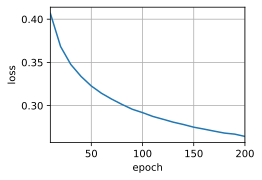

In [25]:
num_hiddens, num_layers, dropout, batch_size, num_steps = 32, 2, 0.1, 64, 10
lr, num_epochs, device = 0.005, 200, d2l.try_gpu()
ffn_num_input, ffn_num_hiddens, num_heads = 32, 64, 4
key_size, query_size, value_size = 32, 32, 32
norm_shape = [32]

train_iter, validation_iter, test_iter, src_vocab, tgt_vocab= load_data_nmt(train_data, validation_data, test_data, batch_size, num_steps)

encoder = TransformerEncoder(
    len(src_vocab), key_size, query_size, value_size, num_hiddens,
    norm_shape, ffn_num_input, ffn_num_hiddens, num_heads,
    num_layers, dropout)
decoder = TransformerDecoder(
    len(tgt_vocab), key_size, query_size, value_size, num_hiddens,
    norm_shape, ffn_num_input, ffn_num_hiddens, num_heads,
    num_layers, dropout)
net = d2l.EncoderDecoder(encoder, decoder)
d2l.train_seq2seq(net, train_iter, lr, num_epochs, tgt_vocab, device)

In [128]:
def predict_seq2seq(net, src_sentence, src_vocab, tgt_vocab, num_steps,
                    device, save_attention_weights=False):
    """Predict for sequence to sequence.

    Defined in :numref:`sec_seq2seq_training`"""
    # Set `net` to eval mode for inference
    net.eval()
    src_tokens = jnp_tokenize(src_sentence)
    src_tokens, _ = build_array_nmt(src_tokens, src_vocab, num_steps)
    src_tokens = src_tokens.view(num_steps)
    enc_valid_len = torch.tensor([len(src_tokens)], device=device)
    # Add the batch axis
    enc_X = torch.unsqueeze(
        torch.tensor(src_tokens, dtype=torch.long, device=device), dim=0)
    

    enc_outputs = net.encoder(enc_X, enc_valid_len)
    dec_state = net.decoder.init_state(enc_outputs, enc_valid_len)
    # Add the batch axis
    dec_X = torch.unsqueeze(torch.tensor(
        [tgt_vocab['<bos>']], dtype=torch.long, device=device), dim=0)
    output_seq, attention_weight_seq = [], []
    for _ in range(num_steps):
        Y, dec_state = net.decoder(dec_X, dec_state)
        # We use the token with the highest prediction likelihood as the input
        # of the decoder at the next time step
        dec_X = Y.argmax(dim=2)
        pred = dec_X.squeeze(dim=0).type(torch.int32).item()
        # Save attention weights (to be covered later)
        if save_attention_weights:
            attention_weight_seq.append(net.decoder.attention_weights)
        # Once the end-of-sequence token is predicted, the generation of the
        # output sequence is complete
        if pred == tgt_vocab['<eos>']:
            break
        output_seq.append(pred)
    return ' '.join(tgt_vocab.to_tokens(output_seq)), attention_weight_seq


In [138]:
for i in range(5):
  translation, _ = predict_seq2seq(net,[test_data[0][i]], src_vocab, tgt_vocab, num_steps, device, True)
  print(f'{test_data[0][i]} => {translation}, {test_data[1][i]}',
          f'bleu {d2l.bleu(translation, test_data[1][i], k=2):.3f}')

ウェイン、調子はどうです？ => so what is it?, How is it going, Wayne? bleu 0.000
まあまあです。 => i'm not too <unk>, I'm not too bad. bleu 0.537
今日はご足労ありがとう。 => thank you for coming today., Thank you very much for coming out today. bleu 0.347
景気はどうです？ => so what kind of <unk>, How's business lately? bleu 0.000
おかげさまで、順調です。 => wow, that's extremely difficult, and really really really really really, It's been good. bleu 0.000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
